In [4]:
#### Importing libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white

In [3]:
## Reading CSV file from dataset
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\dataset_5sec.csv')
data.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [14]:
missing_num = data.isnull().sum()

In [20]:
len(data)
missing_percent = missing_num/len(data)
final_missing = missing_percent.round(4)*100
final_missing.to_csv('missing_percent.csv')

<AxesSubplot:xlabel='target', ylabel='activityrecognition#1'>

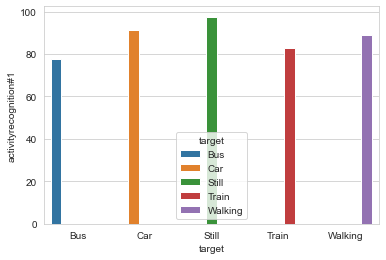

In [8]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].mean()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

<AxesSubplot:xlabel='target', ylabel='activityrecognition#1'>

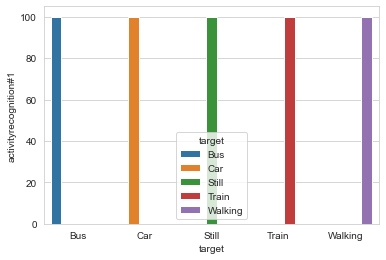

In [9]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].median()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

<AxesSubplot:xlabel='target', ylabel='activityrecognition#1'>

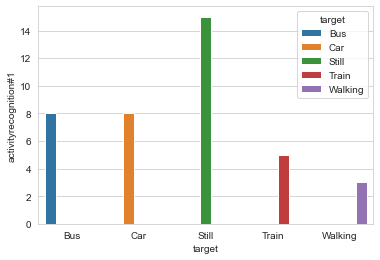

In [21]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].min()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

<AxesSubplot:xlabel='target', ylabel='activityrecognition#1'>

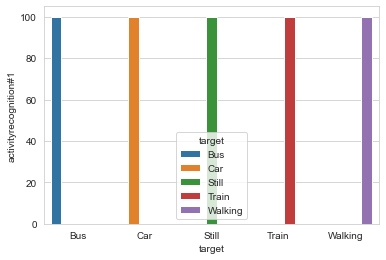

In [22]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].max()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

<AxesSubplot:xlabel='target', ylabel='activityrecognition#1'>

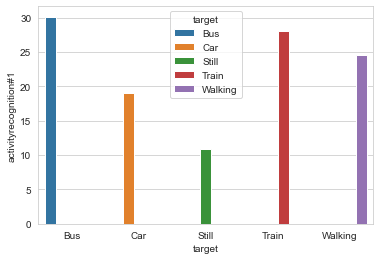

In [23]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].std()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [24]:
data['testing']= data['android.sensor.accelerometer#max']-data['android.sensor.accelerometer#min']
data['testing']==data['android.sensor.accelerometer#std']

0       False
1       False
2       False
3       False
4       False
        ...  
5888    False
5889    False
5890    False
5891    False
5892    False
Length: 5893, dtype: bool